In [73]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
import os
import pylab as plt
import geopandas as gpd
import seaborn as sns
import adjustText as aT
sns.set(style="darkgrid")
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from glob import glob
from os.path import isfile, join
import sys
import pylab as pl

path_input = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R9_data/excel/'
path_lshtm = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/plots/lshtm/'



In [74]:
dist_filename = ['d_6', 'd_7', 'd_8']
od_6 = pd.read_excel(path_input+'compare_CDR_R9_movement.xlsx', sheet_name='d_6', engine='openpyxl')
od_7 = pd.read_excel(path_input+'compare_CDR_R9_movement.xlsx', sheet_name='d_7', engine='openpyxl')
od_8 = pd.read_excel(path_input+'compare_CDR_R9_movement.xlsx', sheet_name='d_8', engine='openpyxl')

od_6.head()


,home_region,cdr_d_6,manicaland_d_6
0,d_1,0.000021,0.001563
1,d_10,0.000282,0.000781
2,d_11,0.000000,0.000781
3,d_12,0.000000,0.000781
4,d_13,0.000511,0.000000


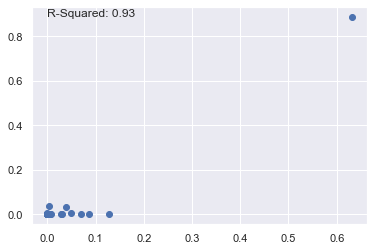

In [75]:
#convert points to format that can be plotted for Rsquared calculation
df_names = ['od_6', 'od_7', 'od_8']

# extract x and y values and convert to dictionaries
x = od_6['cdr_d_6']
x_dict = x.to_dict()
y = od_6['manicaland_d_6']
y_dict = y.to_dict()

# plot with R-Squared
plt.scatter(x,y)

# fit the line 
model = np.polyfit(x,y,1)
predict = np.poly1d(model)
r2 = r2_score(y, predict(x))

# add R-Squared to plot
plt.annotate(f"R-Squared: {r2:.2f}", xy=(np.min(x), np.max(y)), fontsize=12)
# show the plot
plt.show()










In [76]:
# create a list of dataframe names to loop over
df_names = [od_6, od_7, od_8]
d_codes = ['d_6', 'd_7', 'd_8']

# loop over the dataframes
for i, df in enumerate(df_names):
    # extract x and y values and convert to dictionaries
    x = df['cdr_'+d_codes[i]]
    x_dict = x.to_dict()
    y = df['manicaland_'+d_codes[i]]
    y_dict = y.to_dict()

    # plot with R-Squared
    fig, ax = plt.subplots()
    ax.scatter(x,y)

    # fit the line 
    model = np.polyfit(x,y,1)
    predict = np.poly1d(model)
    r2 = r2_score(y, predict(x))

    # add R-Squared to plot
    plt.annotate(f"R-Squared: {r2:.2f}", xy=(np.min(x), np.max(y)), fontsize=12)

    # show the plot
    plt.savefig(path_lshtm+d_codes[i]+'_rsq.png', dpi=300)
    # close the plots so they don't plot over eachother
    plt.close(fig)


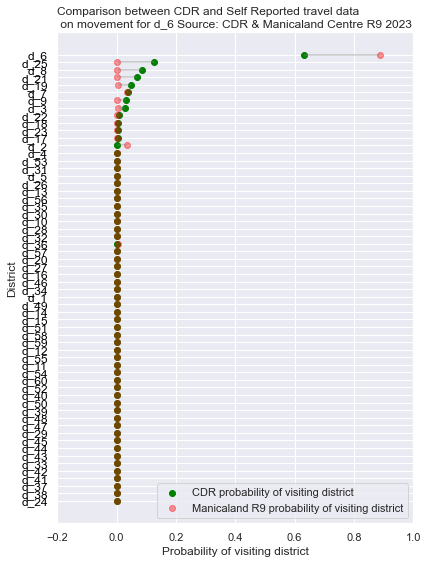

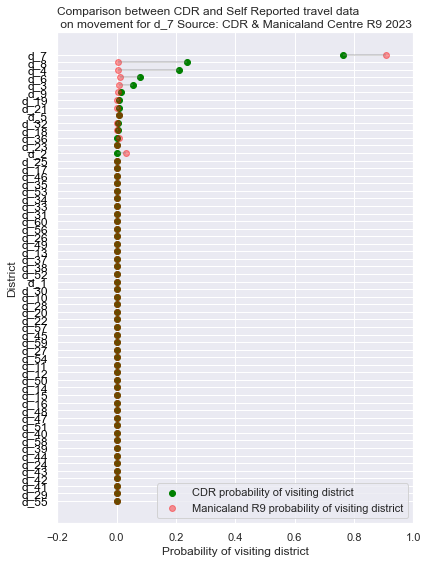

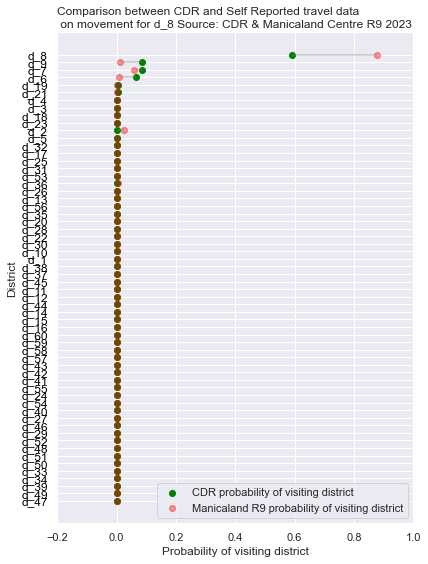

In [83]:
# create a list of dataframe names to loop over
df_names = [od_6, od_7, od_8]
d_codes = ['d_6', 'd_7', 'd_8']

# loop over the dataframes
for i, df in enumerate(df_names):

    # Reorder it following the values of the first value:
    ordered_df = df.sort_values(by='cdr_'+d_codes[i])
    #ordered_df = dist_true_plus_sim[['districtId', 'true_cases_by_dist', 'sim_tot_cases_dist_med']]

    my_range=range(1,len(od_matrix.index)+1)
    fig, ax = plt.subplots (figsize = (6, 8))

    # The horizontal plot is made using the hline function
    plt.hlines(y=my_range, xmin=list(ordered_df['cdr_'+d_codes[i]]), xmax=list(ordered_df['manicaland_'+d_codes[i]]), color='grey', alpha=0.4)
    plt.scatter(ordered_df['cdr_'+d_codes[i]], my_range, color='green', alpha=1, label='CDR probability of visiting district')
    plt.scatter(ordered_df['manicaland_'+d_codes[i]], my_range, color='red', alpha=0.4 , label='Manicaland R9 probability of visiting district')
    plt.legend(loc='lower right')

    # Add title and axis names
    plt.yticks(my_range, ordered_df['home_region'], fontsize=12, weight=12, color='black')
    plt.title("Comparison between CDR and Self Reported travel data \n on movement for "+ d_codes[i] +" Source: CDR & Manicaland Centre R9 2023", loc='left')
    plt.xlabel('Probability of visiting district')
    plt.ylabel('District') 

    # use adjust text function 
    plt.tight_layout()
    #limit range on axis
    plt.xlim([-0.2, 1])

    # Show the graph
    plt.savefig(path_lshtm+d_codes[i]+'_cdr_comp.png', dpi=300)
